# Example 1D heat equation calculations

In this notebook:
1. A 3-parameter time history (change point model)
2. A few examples looking at the sensitivity of #1
3. A model of a seasonal cycle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
from heat import heat

# A simulation with recent sudden cooling superposed on a long term warming trend qualitatively matches the observations.

In [2]:
start_year = 1993
end_year = 2023
number_of_time_steps = 199
max_depth = 150

t = np.linspace(start_year,end_year, number_of_time_steps+1)


def history(nt,steps):
    '''
    Make a stair-stepped array like this:
              ______      _____ 
    _____-----      ------
    
    Based only on the step heights and total length
    '''
    if np.mod(nt,len(steps)) > 0:
        print(np.mod(nt,len(steps)))
        return np.nan
    
    out = np.zeros((nt,1))
    step_size = int(nt/len(steps))
    for i in range(len(steps)):
        out[i*step_size : (i+1)*step_size] = steps[i]
    return out

t_surf=history(number_of_time_steps+1,
               np.hstack( (
                   -30*np.ones(190) +2*np.linspace(0,1,190),
                   -28*np.ones(10) -0.5*np.linspace(0,1,10)
               ) 
               )
              )
print(t[95*2])
U,t,z = heat(t_surf,tmax=end_year,tmin=start_year,nt=number_of_time_steps,zmax=max_depth)

2021.643216080402


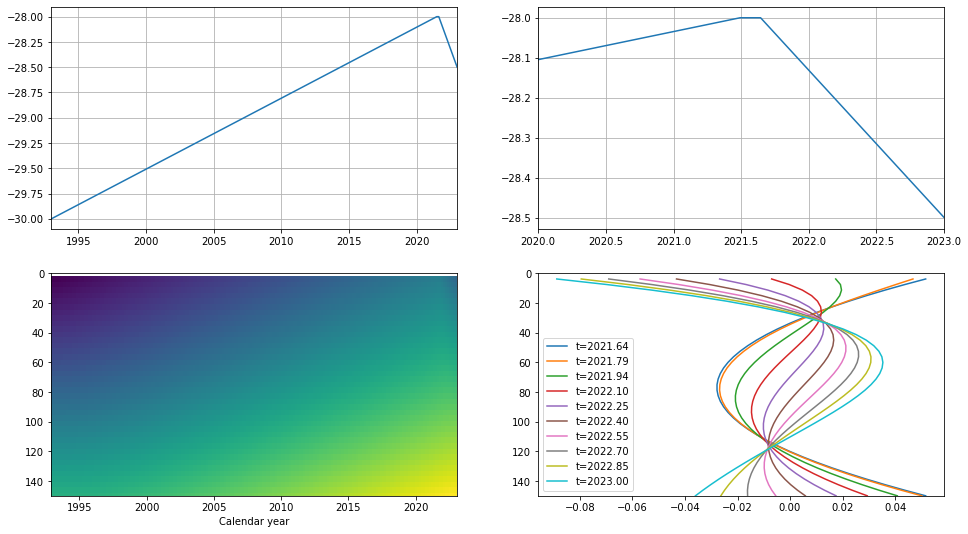

In [3]:
def make_plot(t,t_surf,start_year,end_year,z,U,plot_start_frac=0.95):
    nt=len(t)
    plt.subplots(2,2,figsize=(16,9))
    plt.subplot(221)
    plt.plot(t,t_surf)
    plt.xlim([start_year,end_year])
    plt.grid()

    plt.subplot(222)
    plt.plot(t,t_surf)
    plt.xlim([2020,end_year])
    plt.ylim([min(t_surf[t>2020])*1.001,max(t_surf[t>2020])*0.999])
    plt.grid()

    plt.subplot(223)
    c=plt.pcolormesh(t,z,U)
    # plt.colorbar(c)
    plt.ylim([max_depth,0])
    plt.xlabel('Calendar year')

    plt.subplot(224)
    strt = int((nt+1)*plot_start_frac)
    for i in range( strt,nt):
        plt.plot(detrend(U[:,i]),z,label=f't={t[i]:.2f}')
    # plt.plot(detrend(U[:,-3]),z,'-k',linewidth=3,label=f't={t[-3]:.2f}')
    plt.ylim([max_depth,0])
    plt.legend()
    plt.show()
    
make_plot(t,t_surf,start_year,end_year,z,U)

# How small can the background warming trend be?

2021.643216080402


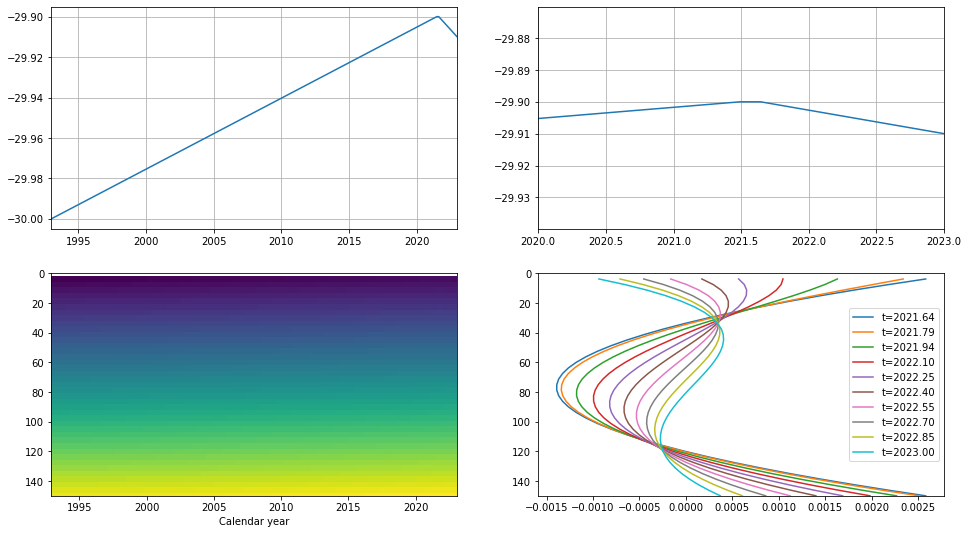

In [4]:

start_year = 1993
end_year = 2023
number_of_time_steps = 199
max_depth = 150

t = np.linspace(start_year,end_year, number_of_time_steps+1)

t_surf=history(number_of_time_steps+1,
               np.hstack( (
                   -30*np.ones(190) +0.1*np.linspace(0,1,190),
                   -29.9*np.ones(10) -0.01*np.linspace(0,1,10)
               ) 
               )
              )
print(t[95*2])
U,t,z = heat(t_surf,tmax=end_year,tmin=start_year,nt=number_of_time_steps,zmax=max_depth)

make_plot(t,t_surf,start_year,end_year,z,U)

# How long as the warming trend been going on?

2022.9547738693468


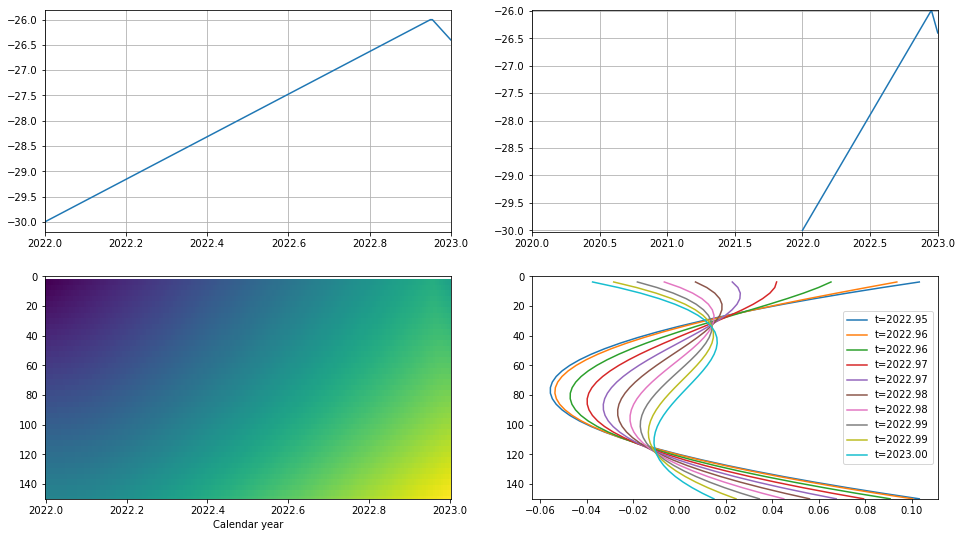

In [5]:

start_year = 2022
end_year = 2023
number_of_time_steps = 199
max_depth = 150

t = np.linspace(start_year,end_year, number_of_time_steps+1)

t_surf=history(number_of_time_steps+1,
               np.hstack( (
                   -30*np.ones(190) +4*np.linspace(0,1,190),
                   -26*np.ones(10) -0.4*np.linspace(0,1,10)
               ) 
               )
              )
print(t[95*2])
U,t,z = heat(t_surf,tmax=end_year,tmin=start_year,nt=number_of_time_steps,zmax=max_depth)

make_plot(t,t_surf,start_year,end_year,z,U)

# Simulations of the season cycle

In [6]:
start_year = 2003
end_year = 2023
number_of_time_steps = (end_year-start_year)*16 - 1
max_depth = 150

# Make a vector of times (units are in decimal years)
t = np.linspace(start_year,end_year, number_of_time_steps+1)

# Force the temperature at the surface to follow a sinusoidal pattern corresponding to an annual fluctuation, 
# plus a mean annual background temperature
mean_annual_T = -10
t_surf= mean_annual_T* np.ones(number_of_time_steps+1) - np.cos(np.pi*2*t)

U,t,z = heat(t_surf,tmax=end_year,tmin=start_year,nt=number_of_time_steps,zmax=max_depth)

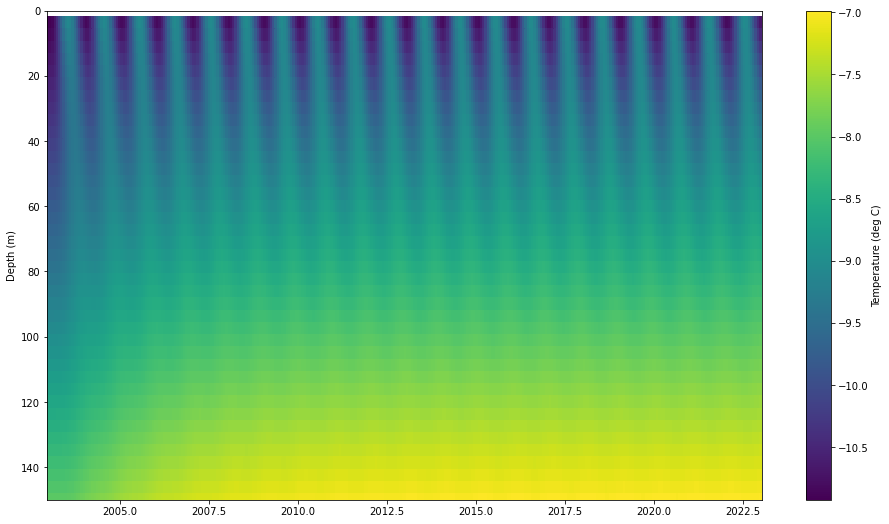

In [7]:
plt.subplots(figsize=(16,9))
cb=plt.pcolor(t,z,U)
plt.colorbar(cb,label='Temperature (deg C)')
plt.ylabel('Depth (m)')
plt.ylim([max_depth,0])
plt.show()

### Temperature profiles through an annual cycle

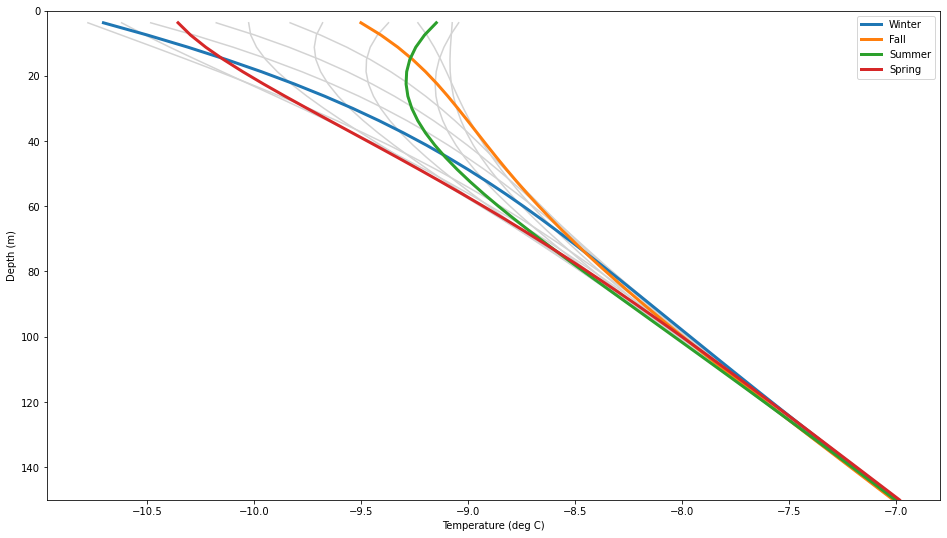

In [8]:
plt.subplots(figsize=(16,9))
for i in range(1,16):
    plt.plot(U[:,-i],z,c='lightgrey')
plt.plot(U[:,-1],z,label=f'Winter',linewidth=3)
plt.plot(U[:,-5],z,label=f'Fall',linewidth=3)
plt.plot(U[:,-9],z,label=f'Summer',linewidth=3)
plt.plot(U[:,-13],z,label=f'Spring',linewidth=3)
plt.legend()
plt.ylabel('Depth (m)')
plt.ylim([max_depth,0])
plt.xlabel('Temperature (deg C)')
plt.show()

The pattern makes more sense if we look at the deviation from a straight line. Plotting the temperatures this way shows that there is a lag time associated with thermal diffusion from the surface to depth.

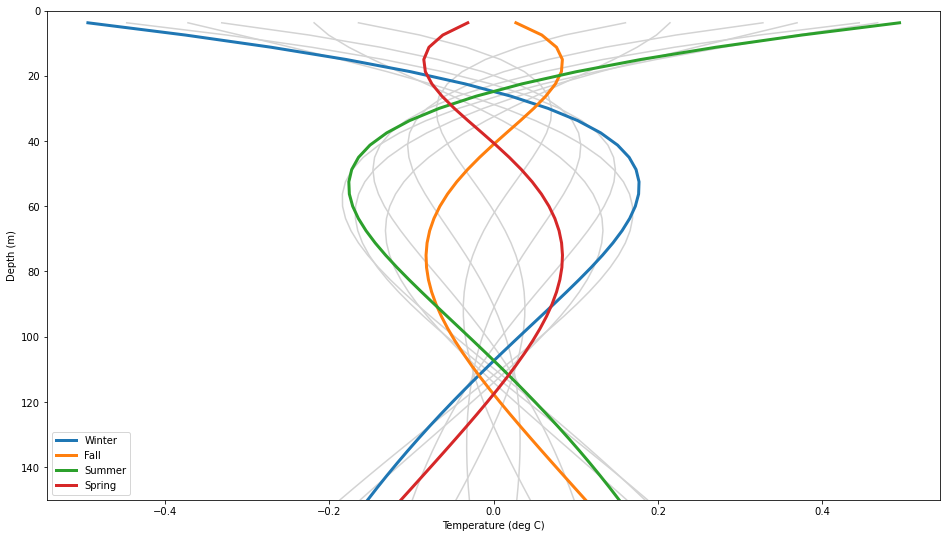

In [9]:
from scipy.signal import detrend
plt.subplots(figsize=(16,9))
for i in range(1,16):
    plt.plot(detrend(U[:,-i]),z,c='lightgrey')
plt.plot(detrend(U[:,-1]),z,label=f'Winter',linewidth=3)
plt.plot(detrend(U[:,-5]),z,label=f'Fall',linewidth=3)
plt.plot(detrend(U[:,-9]),z,label=f'Summer',linewidth=3)
plt.plot(detrend(U[:,-13]),z,label=f'Spring',linewidth=3)
plt.legend()
plt.ylabel('Depth (m)')
plt.ylim([max_depth,0])
plt.xlabel('Temperature (deg C)')
plt.show()

Importantly, we notice that this solution is different from the usual treatment of the seasonal cycle (i.e., as in Patterson):  **The basal heat flux boundary condition results in more variability deeper in the ice column as compared to the typical analytical solution that assumes zero temperature change at infinity**.

# Conclusions so far:
### 1. The signal from Allan Hills likely only reflects temperature fluctuations in the last few years to decades
### 2. A simple annual sinusoid, however, does not capture the exact pattern

# Next steps:
### - Run with station met data
Nearest station is 75km at Elephant Moraine
http://amrc.ssec.wisc.edu/aws/index.php?region=All%20Stations&mode=international
